<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Object%20Detection/YOLO/Yolo_v5_Mask_3_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tara{a,b,c,d,e}

--2023-10-19 06:27:11--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.taraa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.taraa’

maskdataset_3C.tara 100%[===================>]  90.00M   418MB/s    in 0.2s    

2023-10-19 06:27:17 (418 MB/s) - ‘maskdataset_3C.taraa’ saved [94371840/94371840]

--2023-10-19 06:27:17--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tarab
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.tarab’

maskdataset_3C.tara 100%[===================>]  90.00M   399MB/s    in 0.2s  

In [3]:
%pwd

'/content'

In [4]:
!ls -l

total 408152
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Oct 19 06:27 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Oct 17 13:25 sample_data


In [5]:
!cat maskdataset_3C.tar* | tar xf -

In [6]:
!ls -l

total 408156
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Oct 19 06:27 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Oct 19 06:27 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Oct 17 13:25 sample_data
drwxr-xr-x 3 root root     4096 Feb  2  2023 yolo_custom_modeling


# Train vs. Test Split

In [7]:
!pwd

/content


In [8]:
# %cd /content/yolo_custom_modeling
from glob import glob

img_list = glob('/content/yolo_custom_modeling/dataset/images/*.png')

print(len(img_list))

843


In [9]:
from glob import glob

txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print(len(txt_list))

843


In [11]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                  test_size = 0.2,
                                                  random_state = 2045)

print(len(train_img_list), len(valid_img_list))

674 169


In [12]:
print('Train_Img:',train_img_list)
print('Valid_Img:',valid_img_list)

Train_Img: ['/content/yolo_custom_modeling/dataset/images/maksssksksss722.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss64.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss378.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss569.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss447.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss800.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss207.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss276.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss797.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss323.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss121.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss777.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss367.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss675.png', '/content/yolo_custom_modeling/datase

In [13]:
with open('/content/yolo_custom_modeling/dataset/Train.txt','w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolo_custom_modeling/dataset/Valid.txt','w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [14]:
!ls -l /content/yolo_custom_modeling/dataset/*.txt

-rw-r--r-- 1 root root 43714 Oct 19 06:32 /content/yolo_custom_modeling/dataset/Train.txt
-rw-r--r-- 1 root root 10971 Oct 19 06:32 /content/yolo_custom_modeling/dataset/Valid.txt


In [17]:
yaml_text = """train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']
"""

with open('/content/yolo_custom_modeling/dataset/data.yaml','w') as file:
  file.write(yaml_text)

In [18]:
%cat /content/yolo_custom_modeling/dataset/data.yaml

train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']


# Yolov5 Configuration

In [19]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


In [20]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 21 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.66 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (10984/10984), done.


In [38]:
%cd /content/yolo_custom_modeling/yolov5

/content/yolo_custom_modeling/yolov5


In [39]:
%pip install -qr requirements.txt
%pip install -q roboflow

In [22]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


# Model Learning

In [23]:
%cd /content/yolo_custom_modeling/yolov5

/content/yolo_custom_modeling/yolov5


In [26]:
%%time

!python train.py --img 640 --batch 16 --epochs 150 --data /content/yolo_custom_modeling/dataset/data.yaml --weights yolov5s.pt --cache --name mask_yolo5s_results

train: weights=yolov5s.pt, cfg=, data=/content/yolo_custom_modeling/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolo5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

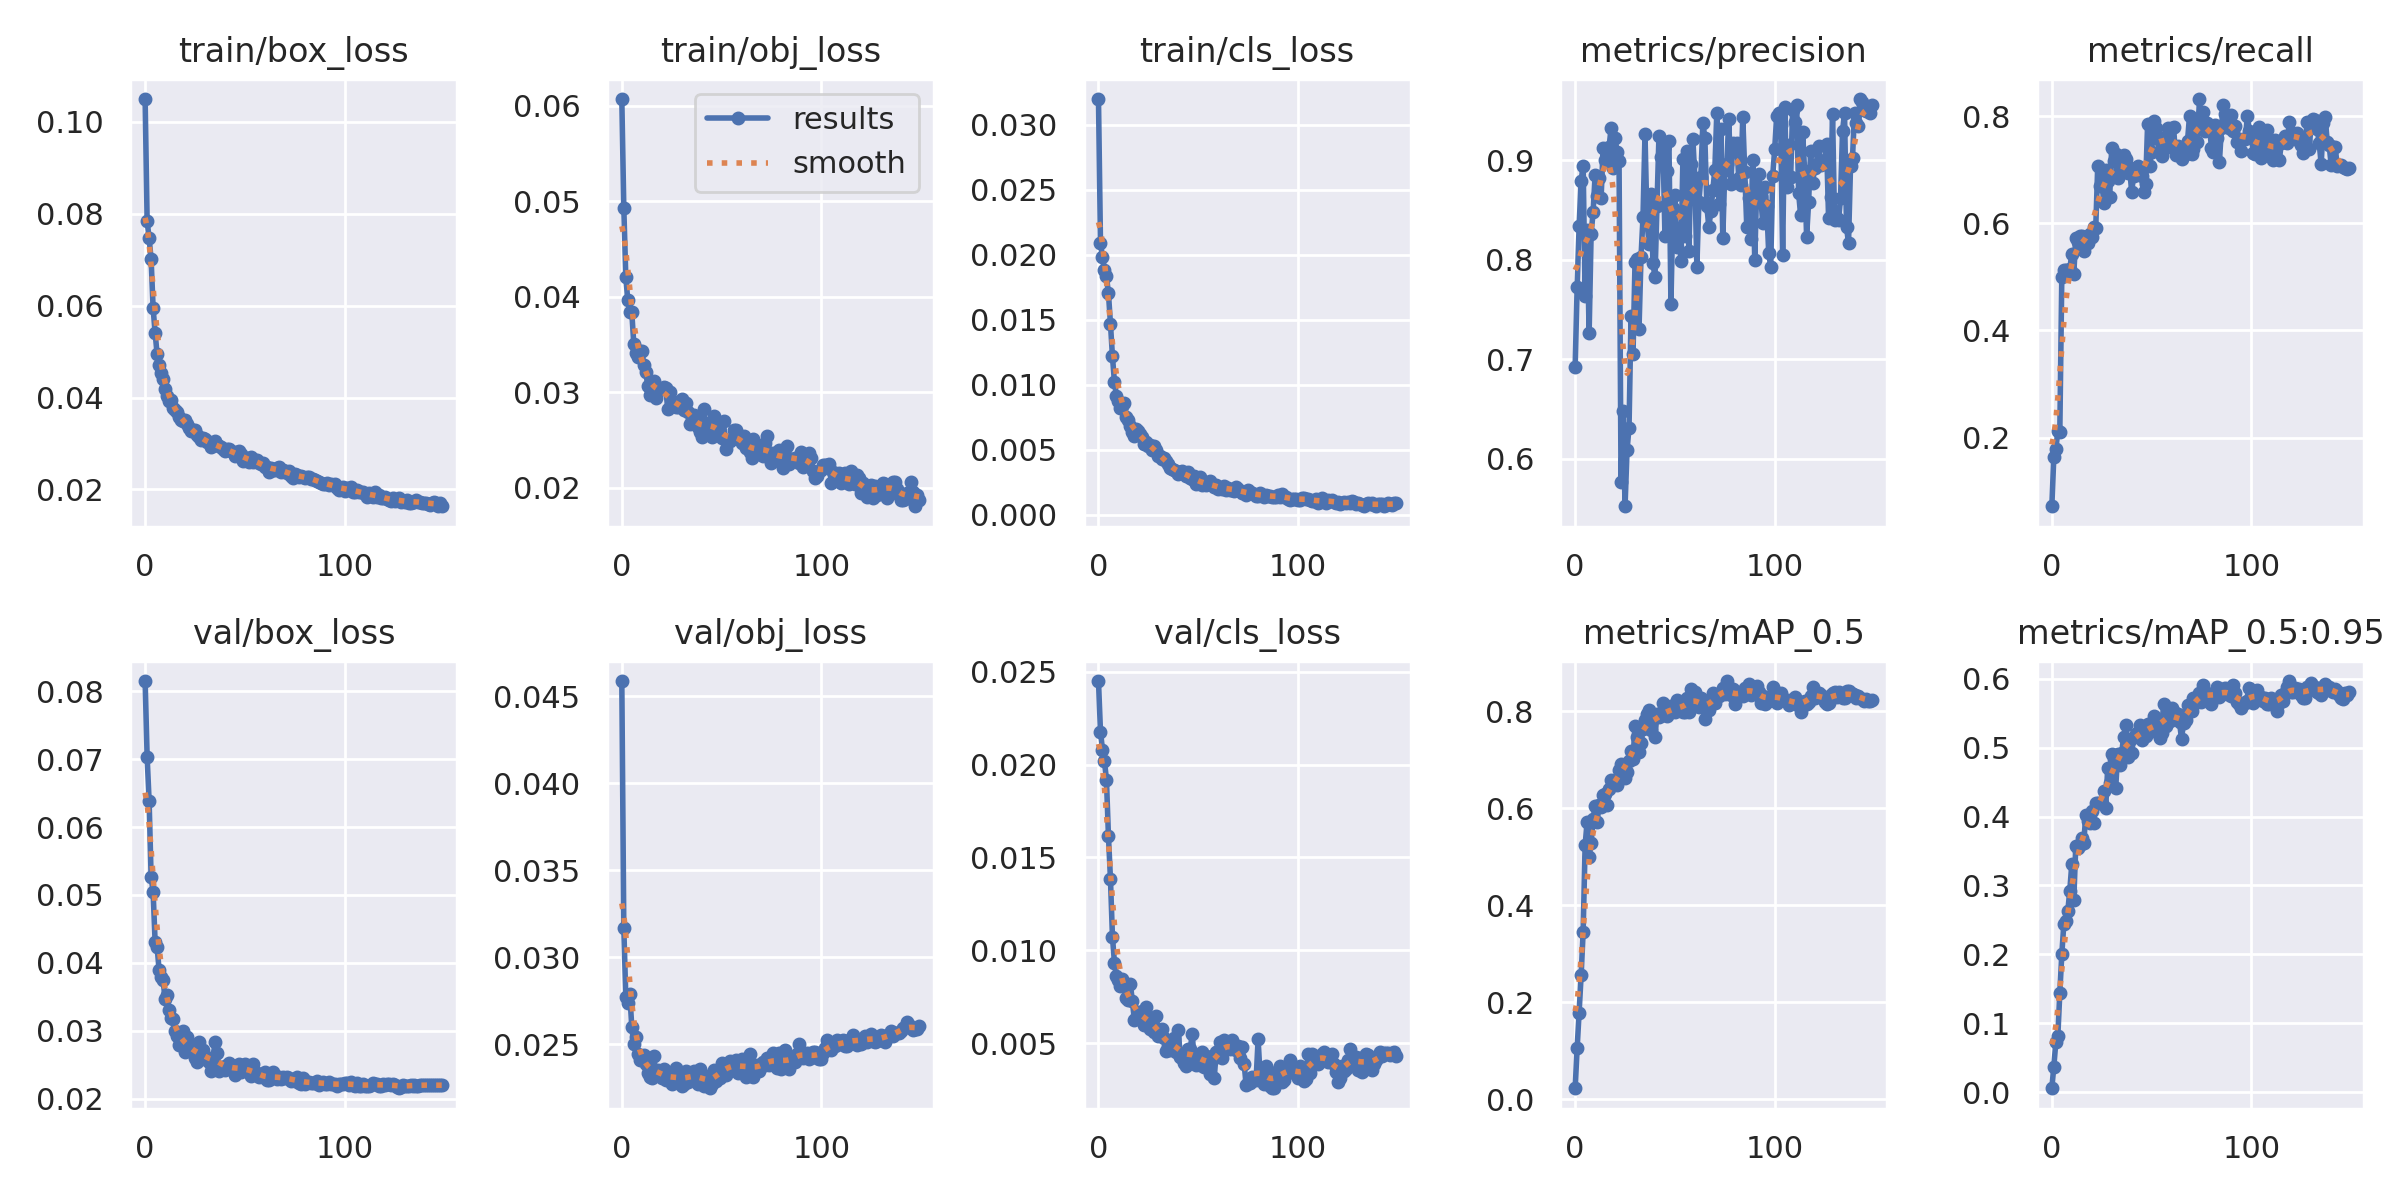

In [29]:
from IPython.display import Image

Image('/content/yolo_custom_modeling/yolov5/runs/train/mask_yolo5s_results2/results.png')

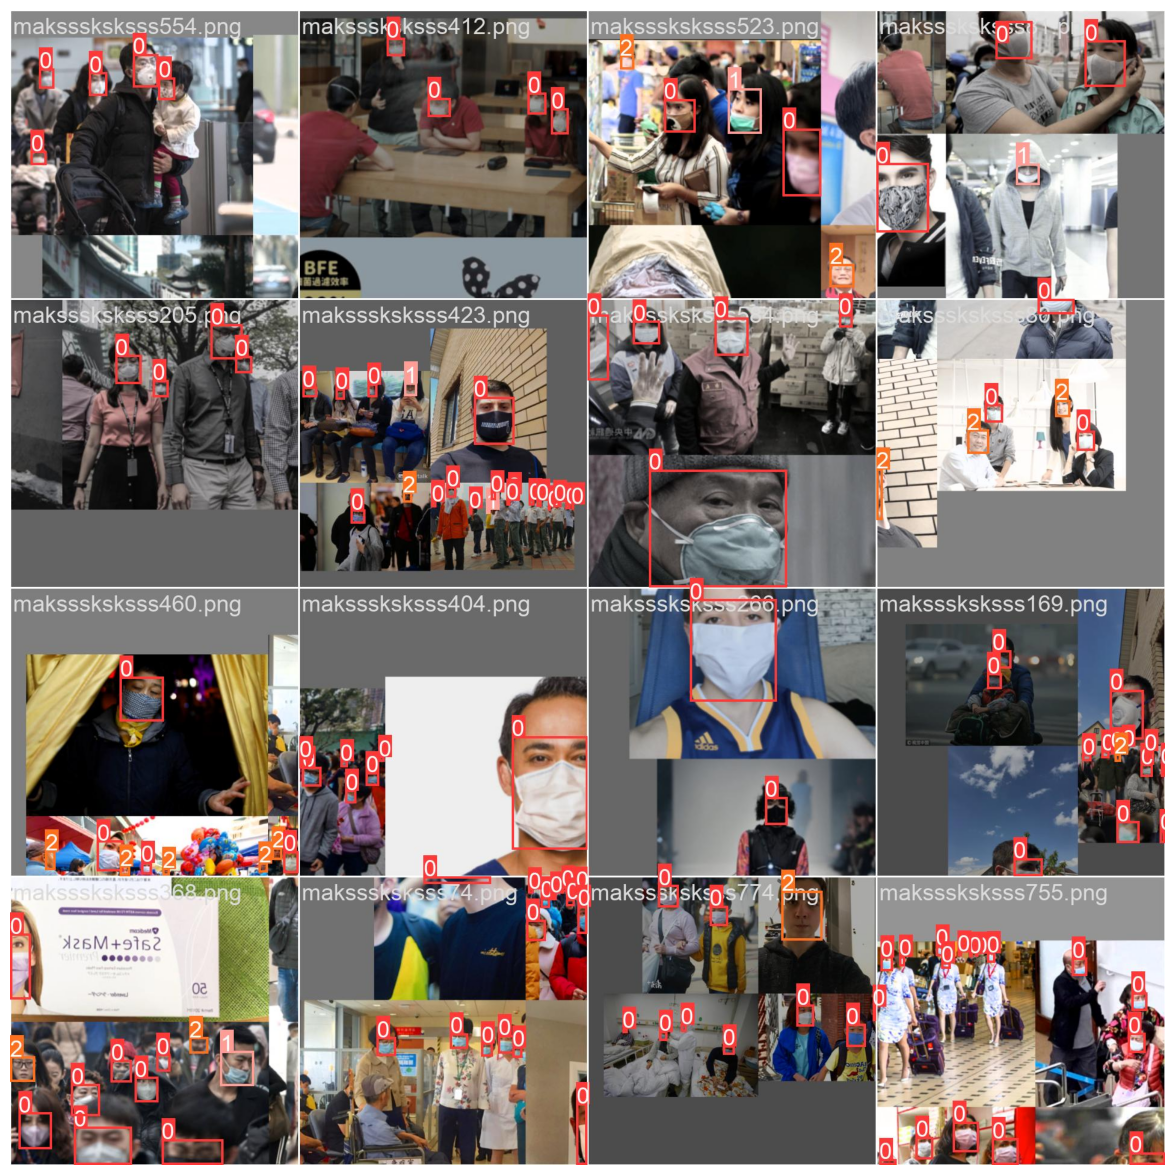

In [33]:
import matplotlib.pyplot as plt

img = plt.imread('/content/yolo_custom_modeling/yolov5/runs/train/mask_yolo5s_results2/train_batch0.jpg')
plt.figure(figsize = (20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Model Validation

In [34]:
!pwd

/content/yolo_custom_modeling/yolov5


In [35]:
!python val.py --data /content/yolo_custom_modeling/dataset/data.yaml --img 640 --weights /content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5_results2/weights/best.pt

val: data=/content/yolo_custom_modeling/dataset/data.yaml, weights=['/content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolo_custom_modeling/yolov5/val.py", line 411, in <module>
    main(opt)
  File "/content/yolo_custom_modeling/yolov5/val.py", line 382, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolo_custom_modeling/yolov5/val.py", line 143, in run
    model = DetectMultiBackend(weights, 

# Model Test

In [36]:
!python detect.py --souce /content/yolo_custom_modeling/dataset/test --img 640 --weights /content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5_results2/weights/best.pt --conf 0.5 --name Mask_Test_Image

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                 [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt] [--save-csv]
                 [--save-conf] [--save-crop] [--nosave] [--classes CLASSES [CLASSES ...]]
                 [--agnostic-nms] [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS] [--hide-labels]
                 [--hide-conf] [--half] [--dnn] [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --souce /content/yolo_custom_modeling/dataset/test


In [37]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolo_custom_modeling/yolov5/runs/detect/Mask_Test_Image/*.png'):
  display(Image(filename=imageName))
  print('\n')

# Save Model to Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cp -r /content/yolov5/runs/train/mask_yolov5s_results /content/drive/MyDrive/Mask_yolov5